In [18]:
import cv2
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image
model=load_model('./models/logoimageclassifier.h5')

In [29]:
image_path = 'ppaa.png'
image = Image.open(image_path)
image = np.array(image)

In [30]:
patch_size = 64  # Size of the patch (e.g., 64x64)
stride = 32  # Stride between patches (e.g., move 32 pixels at a time)

In [37]:
input_shape = (256, 256, 3)

In [54]:
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [49]:
patches = []
for y in range(0, image.shape[0] - patch_size + 1, stride):
    for x in range(0, image.shape[1] - patch_size + 1, stride):
        patch = image[y:y+patch_size, x:x+patch_size]
        patch = tf.image.resize(patch, input_shape[:2])
        patches.append(patch)

In [50]:
patches = np.array(patches)

In [51]:
patches = patches.reshape(-1, patch_size, patch_size, 3)

In [52]:
patches = patches.astype('float32') / 255.0

In [53]:
predictions = model.predict(patches)

ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(32, 64, 64, 3)


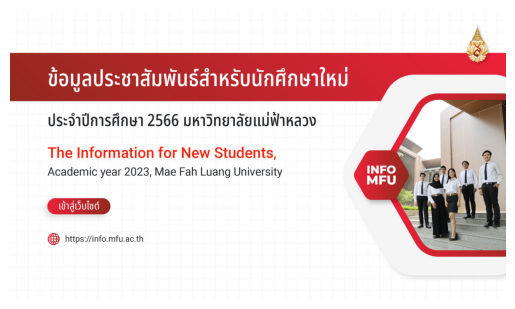

In [3]:
image_path = 'test12.png'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)

# Convert the image data type to uint8
image = tf.image.convert_image_dtype(image, tf.uint8)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
resized_img_bytes = tf.io.encode_jpeg(image)
tf.io.write_file('resized_image.png', resized_img_bytes)
plt.imshow(resized_img_bytes.numpy().astype(int))
plt.show()

AttributeError: 'bytes' object has no attribute 'astype'

In [104]:
resized_img_bytes

NameError: name 'resized_img_bytes' is not defined

In [85]:
if yhat > 0.5: 
    print(f'Predicted class is NotLogo')
else:
    print(f'Predicted class is LogoMFU!!')

Predicted class is LogoMFU!!
